In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import sys
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
import statsmodels.api as sm

In [13]:
app1= pd.read_csv ('/users/sarafarhat/Desktop/data/googleplaystore.csv')

In [17]:
app1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [18]:
app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
app1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
app1.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
app1.shape

(10841, 13)

In [19]:
app1.dropna(inplace=True)

In [20]:
app1.shape

(9360, 13)

In [21]:
app1.Size.value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
169k                     1
986k                     1
485k                     1
696k                     1
613k                     1
Name: Size, Length: 413, dtype: int64

## convert Mb to Kb , and fill in "Varies with device"

In [22]:
def change(Size):
    if 'M'in Size:
        x=Size[:-1]
        x=float(x)*1000
        return x
    elif 'k'in Size:
        x=Size[:-1]
        x=float(x)
        return x
    else:return None

In [23]:
app1.Size=app1.Size.map(change)

In [24]:
app1.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10834     2600.0
10836    53000.0
10837     3600.0
10839        NaN
10840    19000.0
Name: Size, Length: 9360, dtype: float64

## fill NaN 

In [25]:
app1.Size.isna().sum()

1637

In [26]:
app1.Size.fillna(method='ffill',inplace=True)

In [27]:
app1.Size.isna().sum()

0

In [28]:
app1.Reviews.dtype

dtype('O')

In [29]:
app1.Reviews=app1.Reviews.astype('float')

In [30]:
app1.Reviews.dtype

dtype('float64')

In [31]:
app1.Installs.dtype

dtype('O')

In [32]:
app1.Installs.value_counts()[:5]

1,000,000+     1576
10,000,000+    1252
100,000+       1150
10,000+        1009
5,000,000+      752
Name: Installs, dtype: int64

In [33]:
app1.Installs=app1.Installs.map(lambda x:x.replace(',','').replace('+',''))

In [34]:
app1.Installs.value_counts()[:5]

1000000     1576
10000000    1252
100000      1150
10000       1009
5000000      752
Name: Installs, dtype: int64

In [35]:
app1.Installs=app1.Installs.astype('int')

In [36]:
app1.Installs.dtype

dtype('int64')

In [37]:
app1.Price.dtype

dtype('O')

In [38]:
app1.Price.value_counts()[:5]

0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: Price, dtype: int64

In [39]:
app1.Price=app1.Price.map(lambda x:x.replace('$',''))

In [40]:
app1.Price.value_counts()[:5]

0       8715
2.99     114
0.99     106
4.99      70
1.99      59
Name: Price, dtype: int64

In [42]:
app1.Price=app1.Price.astype('float')

In [43]:
app1.Price.dtype

dtype('float64')

In [44]:
app1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Sanity Checks

In [45]:
index_unwanted=app1[(app1.Rating<1) & (app1.Rating>5)].index
app1.drop(index_unwanted,inplace=True)

In [46]:
app1.shape

(9360, 13)

In [47]:
app1.Rating.value_counts()

4.4    1108
4.3    1076
4.5    1037
4.2     951
4.6     823
4.1     707
4.0     567
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      63
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [48]:
app1=app1[app1.Reviews<=app1.Installs].copy()

In [49]:
app1.shape

(9353, 13)

In [50]:
index_unwanted2=app1[(app1.Type=='Free')&(app1.Price>0)].index

In [51]:
app1.drop(index_unwanted2,inplace=True)

In [52]:
app1.shape

(9353, 13)

# Univariate Analysis

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [54]:
app1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,3600.0,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [55]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

<AxesSubplot:xlabel='Price'>

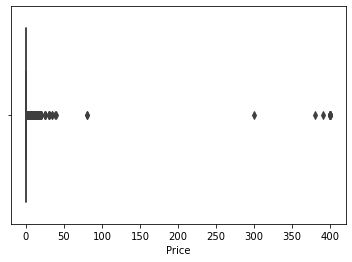

In [56]:
sns.boxplot(app1.Price)

In [89]:
app1.Price.describe()

count    9351.000000
mean        0.961673
std        15.829226
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [61]:
app1.Price.value_counts()

0.00      8711
2.99       114
0.99       105
4.99        70
1.99        59
          ... 
299.99       1
1.59         1
1.61         1
3.90         1
2.90         1
Name: Price, Length: 73, dtype: int64

<AxesSubplot:xlabel='Reviews'>

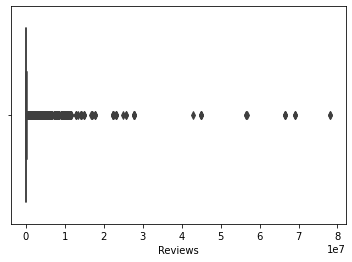

In [57]:
sns.boxplot(app1.Reviews)

In [91]:
app1.Reviews.describe()

count    9.351000e+03
mean     5.148707e+05
std      3.146496e+06
min      1.000000e+00
25%      1.880000e+02
50%      5.968000e+03
75%      8.187600e+04
max      7.815831e+07
Name: Reviews, dtype: float64

<AxesSubplot:>

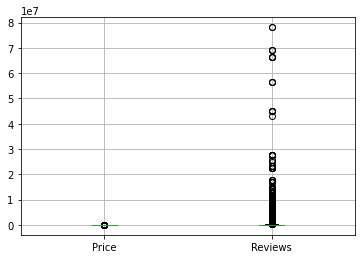

In [59]:
app1.boxplot(column=['Price','Reviews'])

In [60]:
app1.Reviews.value_counts()

2.0          81
3.0          78
5.0          74
4.0          73
1.0          67
             ..
36490.0       1
768833.0      1
3252896.0     1
260651.0      1
1490732.0     1
Name: Reviews, Length: 5989, dtype: int64

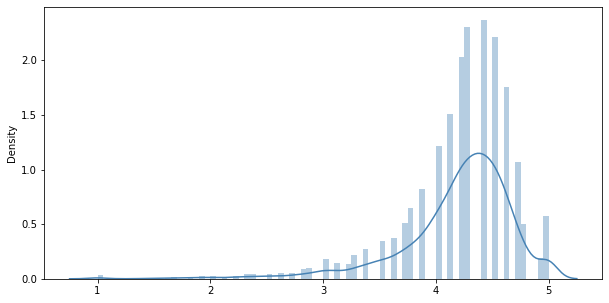

In [73]:
plt.figure(figsize=(10,5))
sns.distplot(x = app1.Rating, hist=True, kde = True, bins = 80,color='steelblue')
plt.show()

In [74]:
app1.Rating.describe()

count    9353.000000
mean        4.191254
std         0.515010
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

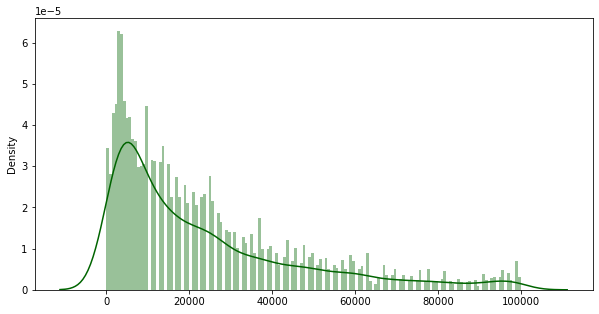

In [84]:
plt.figure(figsize=(10,5))
sns.distplot(x = app1.Size, hist=True, kde = True, bins = 150,color='darkgreen')
plt.show()

In [83]:
app1.Size.describe()

count      9353.000000
mean      23147.924997
std       23252.056438
min           8.500000
25%        5500.000000
50%       15000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [85]:
app1.Size.value_counts()

14000.0    218
11000.0    197
12000.0    195
13000.0    194
15000.0    191
          ... 
812.0        1
809.0        1
784.0        1
976.0        1
143.0        1
Name: Size, Length: 411, dtype: int64

<AxesSubplot:>

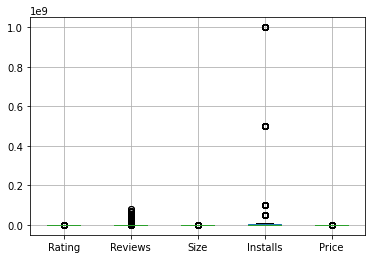

In [87]:
app1.boxplot()

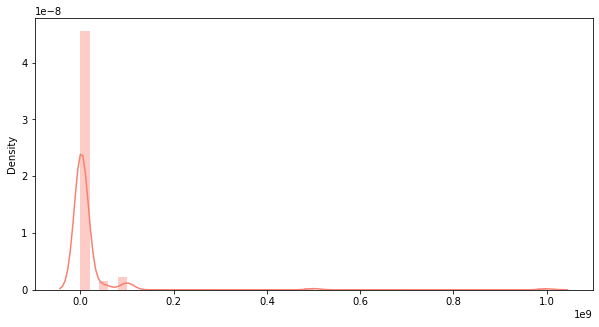

In [97]:
plt.figure(figsize=(10,5))
sns.distplot(x = app1.Installs, hist=True, kde = True, bins = 50,color='salmon')
plt.show()

In [94]:
app1.Installs.describe()

count    9.353000e+03
mean     1.792215e+07
std      9.129920e+07
min      5.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

<AxesSubplot:xlabel='Installs'>

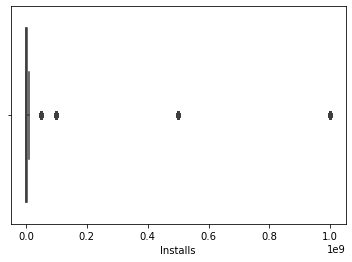

In [95]:
sns.boxplot(app1.Installs)

In [98]:
app1.Installs.value_counts()

1000000       1576
10000000      1252
100000        1150
10000         1008
5000000        752
1000           712
500000         537
50000          466
5000           431
100000000      409
100            309
50000000       289
500            201
500000000       72
10              67
1000000000      58
50              56
5                8
Name: Installs, dtype: int64

## price
### apps that cost above $100 seem to be outliers
# Reviews
### The mean for Reviews is 51487 with a standard deviation of 314649 between values. it looks like a large discrepancy between values,hence 
### many outliers
# Rating
### most apps appear to have high ratings
# Size
### most apps appear to be less than 20,000 in size


In [102]:
app2=app1[app1.Price<200]

In [103]:
app2.shape

(9338, 13)

In [104]:
app2=app2[app2.Reviews<=2000000]

In [105]:
app2.shape

(8885, 13)

In [119]:
app2=app2[app2.Installs<=1000000000]

In [120]:
app2.shape

(8865, 13)

# Percentiles

In [121]:
percentiles=app2[['Rating','Reviews','Size','Installs','Price']]

In [122]:
print('10th percentile:\n',np.percentile(percentiles,10))
print('25th percentile:\n',np.percentile(percentiles,25))
print('50th percentile:\n', np.percentile(percentiles,50))
print('70th percentile:\n',np.percentile(percentiles,70))
print('90th percentile:\n',np.percentile(percentiles,90))
print('95th percentile:\n',np.percentile(percentiles,95))
print('99th percentile:\n',np.percentile(percentiles,99))

10th percentile:
 0.0
25th percentile:
 4.0
50th percentile:
 1000.0
70th percentile:
 18000.0
90th percentile:
 549517.5999999993
95th percentile:
 5000000.0
99th percentile:
 10000000.0


<AxesSubplot:>

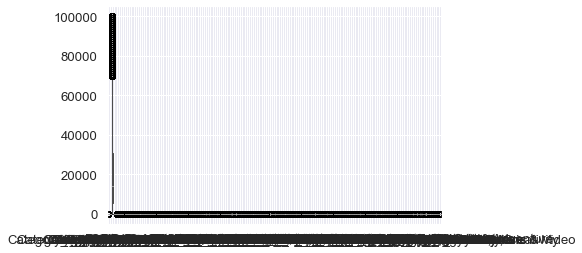

In [146]:
app2.boxplot()

<AxesSubplot:>

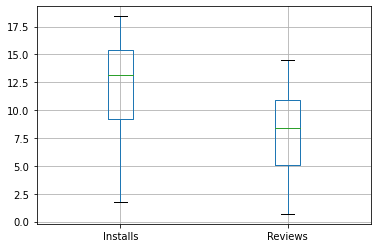

In [124]:
app2.Reviews=app2.Reviews.apply(func=np.log1p)
app2.Installs=app2.Installs.apply(func=np.log1p)
app2.boxplot(column=['Installs','Reviews'])

# The above boxplot shows we got rid of outliers that remained even after dropping certain rows

# Bivariate Analysis

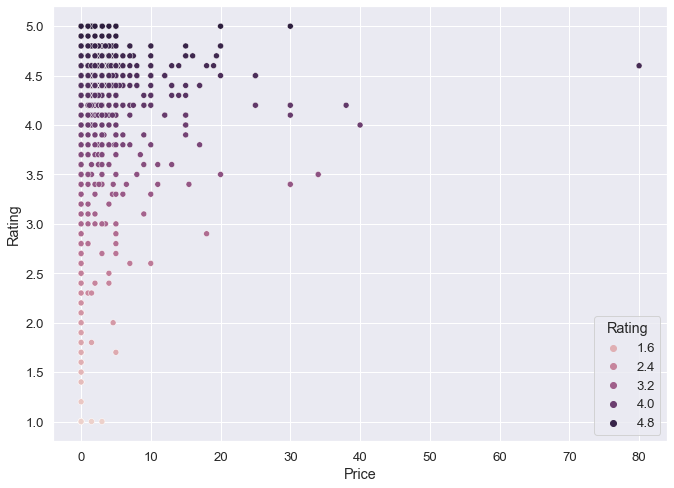

In [128]:
plt.figure(figsize=(11,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(app2.Price,app2.Rating,hue=app2.Rating)
plt.show()

### From the scatterplot, we can notice that the higher priced apps have better ratings. 

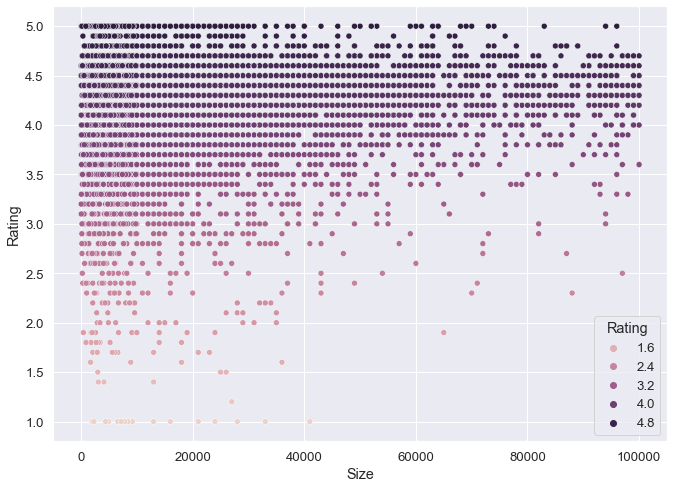

In [129]:
plt.figure(figsize=(11,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(app2.Size,app2.Rating,hue=app2.Rating)
plt.show()

## Not a clean pattern, increase in size doesn't ensure higher ratings,but we can notice that heavy apps are mostly better rated  than lighter apps. 

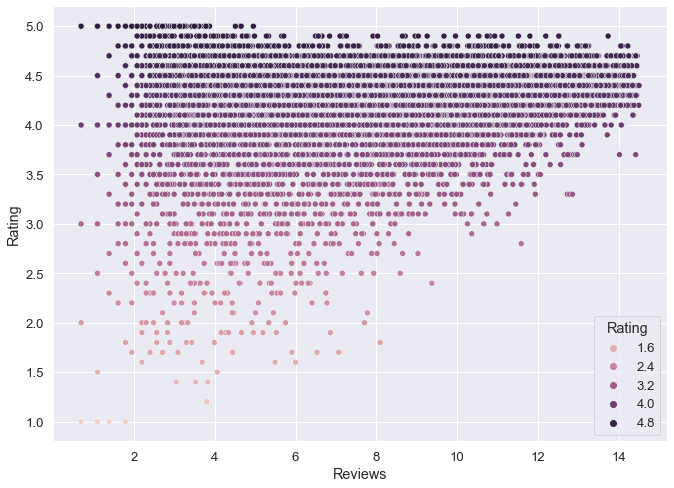

In [130]:
plt.figure(figsize=(11,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(app2.Reviews,app2.Rating,hue=app2.Rating)
plt.show()

## Again, no clear pattern. the scatterplot shows that after a certain point, ratings don't depend on the reviews.

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

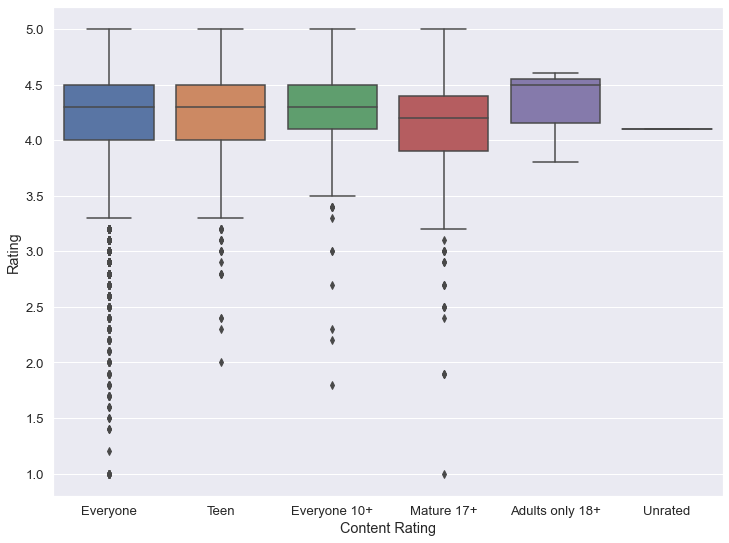

In [135]:
plt.figure(figsize=(12,9))
sns.boxplot(app2['Content Rating'],app2.Rating)

## the median rating for most groups is similar, but the group 'Adults only 18+' has the highest ratings.

Text(0, 0.5, 'Rating')

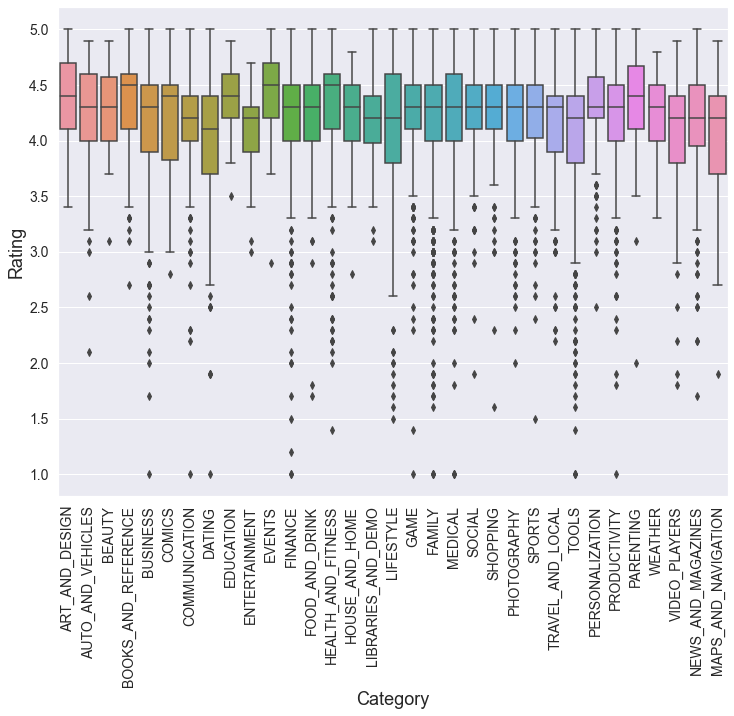

In [137]:
plt.figure(figsize=(12,9))
sns.boxplot(app2.Category,app2.Rating)
plt.xticks(fontsize=14,rotation='vertical')
plt.yticks(fontsize=14)
plt.xlabel('Category',fontsize=18)
plt.ylabel('Rating',fontsize=18)

## Apps that concern Books and Reference,Events and Health and Fitness, appear to have the highest median ratings.

# Data Preprocessing

In [138]:
app2.drop(['App','Last Updated','Current Ver','Android Ver'], axis=1,inplace=True)
app2.shape

(8865, 9)

In [140]:
app2=pd.get_dummies(app2,drop_first=True)
app2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

# Model Building: Linear Regression Model 

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
from statsmodels.api import OLS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms

# 70-30 split

In [142]:
X=app2.iloc[:,1:]
y=app2.iloc[:,:1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
X_train.shape, X_test.shape

((6205, 156), (2660, 156))

In [148]:
Model=linreg.fit(X_train,y_train)
predict=linreg.predict(X_test)

y_test=np.array(y_test)
predict=np.array(predict)

LRM=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predict.flatten()})
LRM.head(10)

,Actual,Predicted
0,4.4,4.336211
1,4.0,4.320824
2,4.4,4.190198
3,3.8,3.963820
4,4.5,4.053356
5,4.0,4.198380
6,4.2,4.430689
7,4.8,4.346168
8,4.5,4.369445
9,4.9,4.309196


<AxesSubplot:>

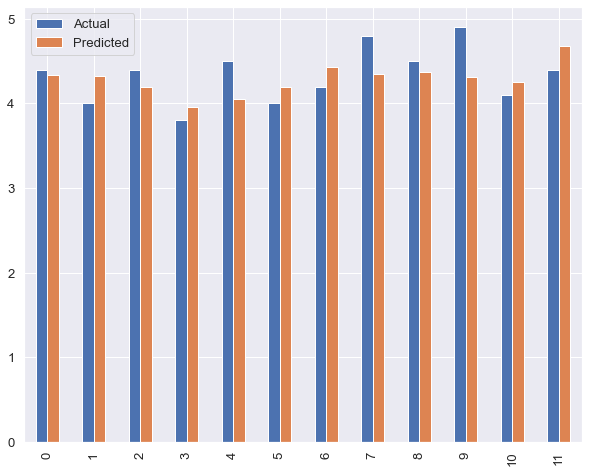

In [149]:
fig=LRM.head(12)
fig.plot(kind='bar',figsize=(10,8))

# The linreg Model has returned good prediction results.

## Summary of the Model

In [150]:
results=OLS(y_train,X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Rating   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3680.
Date:                Fri, 07 May 2021   Prob (F-statistic):                        0.00
Time:                        13:29:55   Log-Likelihood:                         -4257.1
No. Observations:                6205   AIC:                                      8764.
Df Residuals:                    6080   BIC:                                      9606.
Df Model:                         125                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1726      0.006     27.378      0.000       0.160       0.185
Size                                          -9.09e-08   3.35e-07     -0.272      0.786   -7.47e-07    5.65e-07
Installs                                        -0.1446      0.006    -22.986      0.000      -0.157      -0.132
Price                                           -0.0049      0.004     -1.309      0.191      -0.012       0.002
Category_AUTO_AND_VEHICLES                       1.4234      0.140     10.139      0.000       1.148       1.699
Category_BEAUTY                                  1.5445      0.144     10.699      0.000       1.262       1.827
Category_BOOKS_AND_REFERENCE                     1.4883      0.138     10.767      0.000       1.217       1.759
Category_BUSINESS                                1.3846      0.138     10.069      0.000       1.115       1.654
Category_COMICS                                  2.1166      0.241      8.768      0.000       1.643       2.590
Category_COMMUNICATION                           1.3457      0.138      9.764      0.000       1.076       1.616
Category_DATING                                  1.2820      0.139      9.240      0.000       1.010       1.554
Category_EDUCATION                               2.4283      0.281      8.649      0.000       1.878       2.979
Category_ENTERTAINMENT                           2.3731      0.281      8.459      0.000       1.823       2.923
Category_EVENTS                                  1.5565      0.142     10.930      0.000       1.277       1.836
Category_FAMILY                                  2.4744      0.274      9.016      0.000       1.936       3.012
Category_FINANCE                                 1.3507      0.138      9.823      0.000       1.081       1.620
Category_FOOD_AND_DRINK                          1.3722      0.140      9.832      0.000       1.099       1.646
Category_GAME                                    2.7145      0.274      9.922      0.000       2.178       3.251
Category_HEALTH_AND_FITNESS                      1.4210      0.138     10.322      0.000       1.151       1.691
Category_HOUSE_AND_HOME                          1.4327      0.141     10.193      0.000       1.157       1.708
Category_LIBRARIES_AND_DEMO                      1.4429      0.141     10.219      0.000       1.166       1.720
Category_LIFESTYLE                               1.7688      0.244      7.245      0.000       1.290       2.247
Category_MAPS_AND_NAVIGATION                     1.3266      0.139      9.517      0.000       1.053       1.600
Category_MEDICAL                              

In [153]:
print('R2=',r2_score(y_test,predict))
print('root mean squared error_RMSE=',np.sqrt(ms(y_test,predict)))
print('prediction error percentage is:',round((0.50/np.mean(y_test))*100))

R2= 0.12696134748276477
root mean squared error_RMSE= 0.4897736168621917
prediction error percentage is: 12


### In this data, the F-statistic is 3680. This means a less p value because a large F-stat value corresponds to a statistically significant p value (p<0.05). So, this means that one (or more) of the predictor variables is significantly related to the outcome variable.

### The adjusted R is 0.987. This means that the observed(actual) outcome and predicted outcome values are highly correlated,which is a good thing.

### The prediction error RMSE is 0.5 with an error rate of 12%. This error rate is low and shows that the avg difference between the actual outcome values and the predicted outcome values in the test data is low(0.5).